# Parks and Buildings data

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Question 1

Load the `'parks.csv'` data set and obtain the `value_counts()` for each state. Use the Pandas `plot()` function to create a `'bar'` chart with the `value_counts()`. Which state has the highest number of National Parks?

California state has highest number of National Parks


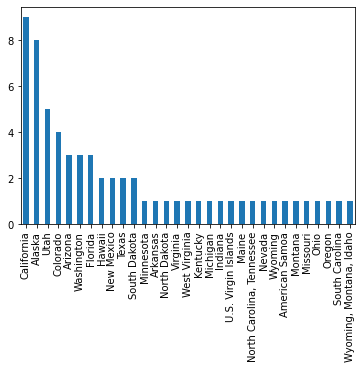

In [117]:
parks = pd.read_csv('parks.csv') 
parks['location'].value_counts().plot(kind='bar')
print('California state has highest number of National Parks')

### Question 2

Group the `parks` data by `location` to find the `mean` number of `visitors_2019` for each state, then `plot()` these results using a `'bar'` chart again. Does this graph look the same or different from the graph in Question 1? (**Note:** Remember to pass `sort_values(ascending=False)` after your `groupby` aggregation to plot the values in descending order from most-visited states to least-visited!)

The graph looks different from the first one. Here there is a gradual decrease in the slope of the graph


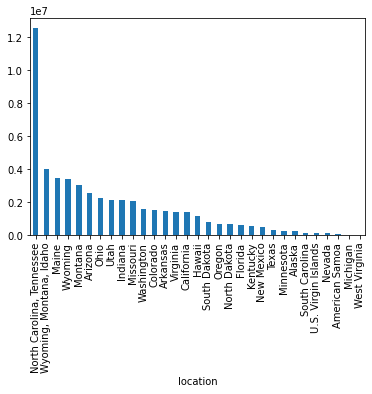

In [118]:
parks['visitors_2019'].groupby(parks['location']).mean().sort_values(ascending=False).plot(kind='bar')
print('The graph looks different from the first one. Here there is a gradual decrease in the slope of the graph')

# Question 3

Are older parks more popular than newer parks? To find out, first create a new variable for the `'year'` of establishment by passing the `'date_estb'` column in the function `pd.DatetimeIndex().year` (we will cover this in more depth in Class 5.) To account for multiple parks being opened in the same year, create a new DataFrame grouping the `parks.csv` data by `'year'` and summing the `'visitors_2019'` for each year and `reset_index()`. Then create a line plot with `'year'` on the x-axis and `'visitors_2019'` on the y-axis using this grouped DataFrame.

Older parks are indeed more popular than the newer parks


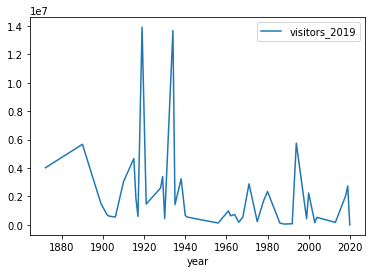

In [119]:
parks['year']=pd.DatetimeIndex(parks['date_estb']).year
years = parks['visitors_2019'].groupby(parks['year']).sum().reset_index()
years.plot.line(y='visitors_2019', x='year')
print('Older parks are indeed more popular than the newer parks')

### Question 4

Use Seaborn's `boxplot` function to compare the number of visitors to the national parks in Texas, California, and Arizona. Though these states have the largest numbers of national parks, do they see the same number of visitors? (**Note:** You will have to pass a subset of the DataFrame to the `data` argument to select only these three states. Recall that `.isin()` can take a list of strings when creating a Boolean mask for your data.)

No. Arizona has the highest visitors at a single park among these 3 and overall California has highest visitors.


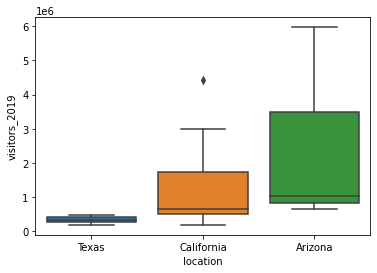

In [120]:
samp1 = parks.loc[parks['location'].isin(['Arizona', 'California', 'Texas'])]
#samp2 = samp1['visitors_2019'].groupby(samp1['location']).sum().reset_index()
sns.boxplot(x='location', y='visitors_2019', data = samp1)
print('No. Arizona has the highest visitors at a single park among these 3 and overall California has highest visitors.')

### Question 5

Do people flock to larger parks? Plot a scatterplot of `area_2019` by `visitors_2019` using Seaborn's `regplot` function.

Yes. People flock to larger parks


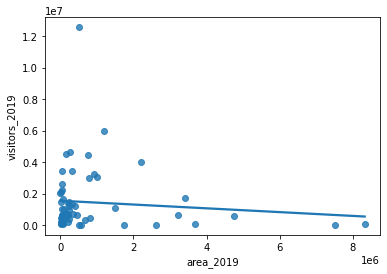

In [121]:
sns.regplot(x = 'area_2019', y = 'visitors_2019', ci=None, data = parks)
print('Yes. People flock to larger parks')

### Question 6

Load the data `'nyc_buildings.csv'` and create a scatterplot of `height` and `floors`. Does the relationship between these two variables appear stronger or weaker than the relationship seen in Question 5?

The relationship between these two variables appears stronger than seen in Question 5 


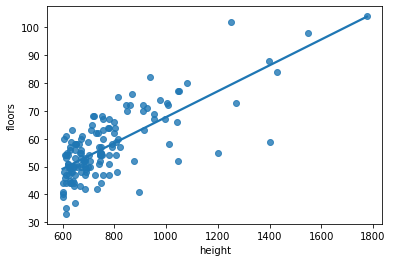

In [122]:
build = pd.read_csv('nyc_buildings.csv') 
sns.regplot(x = 'height', y = 'floors', ci=None, data = build)
print('The relationship between these two variables appears stronger than seen in Question 5 ')

### Question 7

Group the `nyc_buildings` data by `year` and `sum` the total `height` for all buildings. Plot the resulting DataFrame as a line plot. Are the tallest buildings in New York relatively old or relatively young?

Tallest buildings in New York relatively young


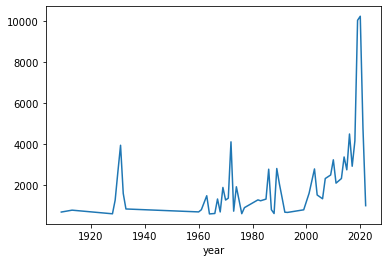

In [123]:
hsum = build['height'].groupby(build['year']).sum()
hsum.plot.line(x='height', y='year')
print('Tallest buildings in New York relatively young')

### Question 8

Are there streets in New York where tall buildings are especially concentrated? Group the data by `street` and `sum` the `height` of the buildings. Reset the index and sort the values from tallest to smallest. Create a bar plot of the top 10 streets with the tallest total heights. Is anything surprising? (**Note:** To view the x-axis labels more clearly, first declare your subplots with `f, ax = plt.subplots()` before creating your barplot. In the barplot options, set `ax=ax`. Then you can use `ax.set_xticklabels` and pass the list of top ten street names as the labels while explicitly declaring the degrees of rotation you would like to see.)

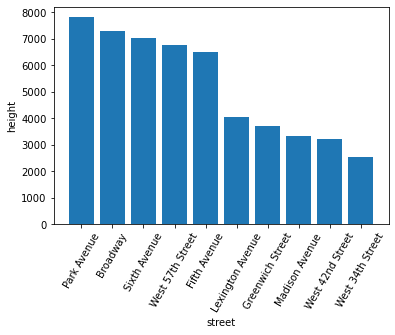

There are streets where tall buildings are concentrated. There is drastic gap of heights between the top five streets with tallest buildings and the next 5 streets


In [124]:
g8 = build['height'].groupby(build['street']).sum().sort_values(ascending=False).reset_index()
q8 = g8.head(10)
q8i = q8.set_index('street')
fig, ax = plt.subplots()
ax.bar(q8i.index, q8i['height'])
ax.set(xlabel="street", ylabel="height")
ax.set_xticks(q8i.index)
ax.set_xticklabels(q8i.index,rotation = 60)
plt.show()
print('There are streets where tall buildings are concentrated. There is drastic gap of heights between the top five streets with tallest buildings and the next 5 streets')


### Question 9

Look at the distribution of `floors` in the `nyc_buildings` data using Seaborn's `distplot` function. Use 25 bins. Then `print` the `mean` number of `floors` in the data set -- does this agree with what you would have expected from looking at the graph?

Mean: 57.15172413793103
Yes. It agree with what I expected from the graph as the median is between 57 - 58 


/Users/sandeep/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


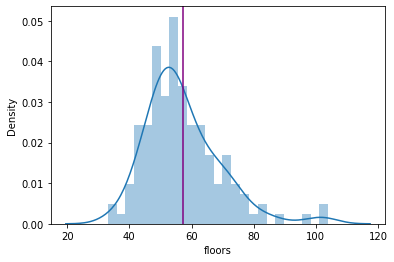

In [125]:
data = build['floors']
sns.distplot(data, bins=25)
print('Mean:', build['floors'].mean())
plt.axvline(x=build['floors'].mean(),color='purple')
print('Yes. It agree with what I expected from the graph as the median is between 57 - 58 ')

### Question 10

Are there height differences between even-numbered floors and odd-numbered floors in New York? Recall that we can use `np.where()` to create a new variable, and that the modulus operator `%` will return the remainder. Create a binary variable called `'even'` where the field is `True` for an even number of floors and `False` for odd. Using Seaborn's `catplot` function, set `col='even'` and `kind='box'` to compare the two different `y='height'`. What do you observe?

Yes. There is difference between even-numbered floors and odd-numbered floors in New York.
Even numbered floors are greater than odd numbered floors and most of the tallest buildings are the ones with Even-numbered floors. 


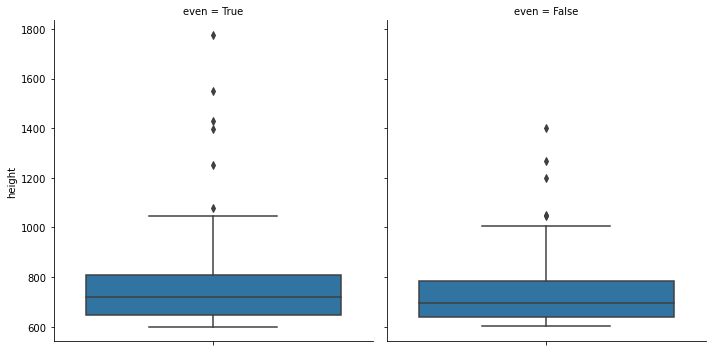

In [126]:
build['even'] = np.where(build['floors'] % 2 == 0, 'True', 'False')
sns.catplot(y="height",data=build, kind = 'box', col = "even")
print('Yes. There is difference between even-numbered floors and odd-numbered floors in New York.\nEven numbered floors are greater than odd numbered floors and most of the tallest buildings are the ones with Even-numbered floors. ')